# Visualizing Data with ChatGPT

What you see here is a **Jupyter Notebook**. It allows us to blend words and code. We use it for teaching here at Columbia Journalism School, but you can also use something like this to tell stories, or to communicate with your editors, switching back and forth between computation and narrative text.

> _The notebook you're in right now is set up to allow you to use **Python** and **R** in the same notebook! **We will mostly ignore the Python parts of this notebook for now and work in R alone**, but students at Columbia Journalism School in the Data M.S. program do learn both languages so that they can use different tools for different jobs. We try to focus more on computational thinking rather than specific tools so that you will hopefully build a skillset that will allow you to pick up whatever the new tool is a few years from now!_

Please read the instructions in each section below before runing the code.

## Setup

Run the cells in this section to setup the notebook. 

> _Press the "play" button to the left of the cell to run each cell indvidually or click on the cell and press shift+enter_

load python packages

In [53]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


load r packages

In [54]:
%%R

# tidyverse is an R package that includes ggplot2

require('tidyverse')

# How to use this notebook:

Below is a Python cell, there is nothing at the top of the cell because it is python by default.

In [55]:
# load the data
df = pd.read_csv('ny_election_results_tidy.csv')
df

,year,county,office,nyc,party,votes
0,2022,ALBANY,Governor,Outside NYC,Republican,47545
1,2022,ALLEGANY,Governor,Outside NYC,Republican,11974
2,2022,BRONX,Governor,NYC,Republican,44948
3,2022,BROOME,Governor,Outside NYC,Republican,38343
4,2022,CATTARAUGUS,Governor,Outside NYC,Republican,18265
...,...,...,...,...,...,...
3901,1998,WASHINGTON,Governor,Outside NYC,Other,2287
3902,1998,WAYNE,Governor,Outside NYC,Other,8330
3903,1998,WESTCHESTER,Governor,Outside NYC,Other,22084
3904,1998,WYOMING,Governor,Outside NYC,Other,2517


Below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [56]:
%%R 

df <- read.csv('ny_election_results_tidy.csv')

df %>% head(10)

   year      county   office         nyc      party votes
1  2022      ALBANY Governor Outside NYC Republican 47545
2  2022    ALLEGANY Governor Outside NYC Republican 11974
3  2022       BRONX Governor         NYC Republican 44948
4  2022      BROOME Governor Outside NYC Republican 38343
5  2022 CATTARAUGUS Governor Outside NYC Republican 18265
6  2022      CAYUGA Governor Outside NYC Republican 16725
7  2022  CHAUTAUQUA Governor Outside NYC Republican 28268
8  2022     CHEMUNG Governor Outside NYC Republican 18364
9  2022    CHENANGO Governor Outside NYC Republican 11871
10 2022     CLINTON Governor Outside NYC Republican 15590


## Let's Make A Plot!

**🤖 My first prompt to ChatGPT:**

I have a CSV file called `ny_election_results_tidy.csv` which contains election results for President, Senate and Governor elections in New York State by county from 1998 to 2022. It has the following columns:

- year: the year the election was held
- county: a county in New York State
- office: Governor, Senate or President
- nyc: whether or not the county is in New York City ("NYC" or "Outside NYC")
- party: either Democratic, Republican or Other
- votes: the number of votes received

I want to write some ggplot code in R to visualize these election results. I want to make a column chart that shows democratic versus republican vote totals across the whole state for each election type. Can you help me?




`summarise()` has grouped output by 'year', 'office'. You can override using
the `.groups` argument.


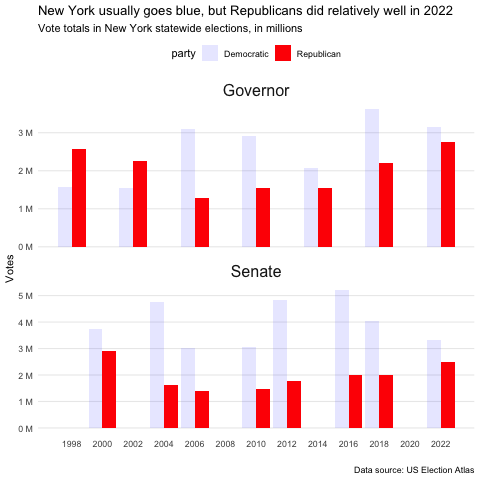

In [57]:
%%R 

# group by year, office, and party
df <- df %>%
    group_by(year, office, party) %>%
    summarize(votes = sum(votes))

# filter out other
df <- df %>%
    filter(party != 'Other', office !='President')

# plot
ggplot(df) + 
    aes(x=year, y=votes, fill=party, alpha=party) +
    geom_col(position='dodge') +
    facet_wrap(~office, scales='free_y', ncol=1) +
    scale_fill_manual(values = c("Democratic" = "blue", "Republican" = "red")) +
    theme_minimal() + 
    theme(
        legend.position="top", 
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(),
        strip.text.x = element_text(size=16),
    ) +
    scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6)) +
    scale_x_continuous(breaks = seq(1998, 2022, 2)) +
    labs(
        title = 'New York usually goes blue, but Republicans did relatively well in 2022',
        subtitle = 'Vote totals in New York statewide elections, in millions',
        caption = 'Data source: US Election Atlas',
        x = '', y='Votes'
    )